# Análisis sobre temperatura y precipitaciones en la Ciudad de Buenos Aires (Período 1991 - 2020)

En el siguiente análisis de datos obtenidos por medio de las bases de datos abiertas de la Ciudad de Buenos Aires voy a presentar una serie de gráficos y visualizaciones a fin de mostrar las progresiones y los valores de dos indicadores climáticos a traves del tiempo que son por un lado las temperaturas, las cuales serán expresadas en grados Celsius y por otro lado las precipitaciones que serán expresadas en mm en el período comprendido entre el año 1991 al año 2020.

## Importo las librerías con las cuales voy a trabajar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
from IPython.display import Image

## Lectura de la base de datos e información de la misma

In [22]:
df = pd.read_excel('Clima_BsAs_1991_2020.xlsx', index_col='ID')
df.head()

,Año,Mes,Temp. Máx,Temp. Mín,Temp. Media,mm,días precip.
ID,,,,,,,
1,1991,Enero,28.4,19.8,24.10,190.0,7
2,1991,Febrero,27.8,17.8,22.80,30.5,6
3,1991,Marzo,27.6,18.4,23.00,55.0,8
4,1991,Abril,22.4,13.6,18.00,125.6,12
5,1991,Mayo,20.7,12.2,16.45,68.4,7


In [23]:
df.tail()

,Año,Mes,Temp. Máx,Temp. Mín,Temp. Media,mm,días precip.
ID,,,,,,,
356,2020,Agosto,19.0,9.2,14.10,29.6,6
357,2020,Septiembre,19.3,9.8,14.55,105.9,5
358,2020,Octubre,22.1,12.4,17.25,94.7,8
359,2020,Noviembre,26.5,17.3,21.90,68.1,4
360,2020,Diciembre,29.0,18.0,23.50,55.7,7


In [24]:
df.describe()

,Año,Temp. Máx,Temp. Mín,Temp. Media,mm,días precip.
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2005.500000,22.938028,13.826111,18.382069,104.647500,9.650000
std,8.667488,5.103237,4.496478,4.773795,74.016976,3.611302
min,1991.000000,12.600000,4.600000,8.950000,0.400000,1.000000
25%,1998.000000,18.500000,10.100000,14.187500,48.625000,7.000000
50%,2005.500000,22.800000,13.600000,18.225000,90.550000,10.000000
75%,2013.000000,27.700000,18.025000,22.900000,142.175000,12.000000
max,2020.000000,32.500000,21.700000,27.000000,421.000000,23.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ano           360 non-null    int64  
 1   Mes           360 non-null    object 
 2   Temp. Máx     360 non-null    float64
 3   Temp. Mín     360 non-null    float64
 4   Temp. Media   360 non-null    float64
 5   mm            360 non-null    float64
 6   días precip.  360 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 19.8+ KB


## Temperatura anual media en la Ciudad de Buenos Aires (1991 - 2020)

In [29]:
filtro1 = df.groupby('Año').agg({
    'Temp. Media':'mean'
})
filtro1.tail()

,Temp. Media
Año,
2016,18.104167
2017,19.079167
2018,18.904167
2019,18.883333
2020,18.583333


In [31]:
filtro1.to_excel('Promedio_anual.xlsx')

In [32]:
media = pd.read_excel('Promedio_anual.xlsx')

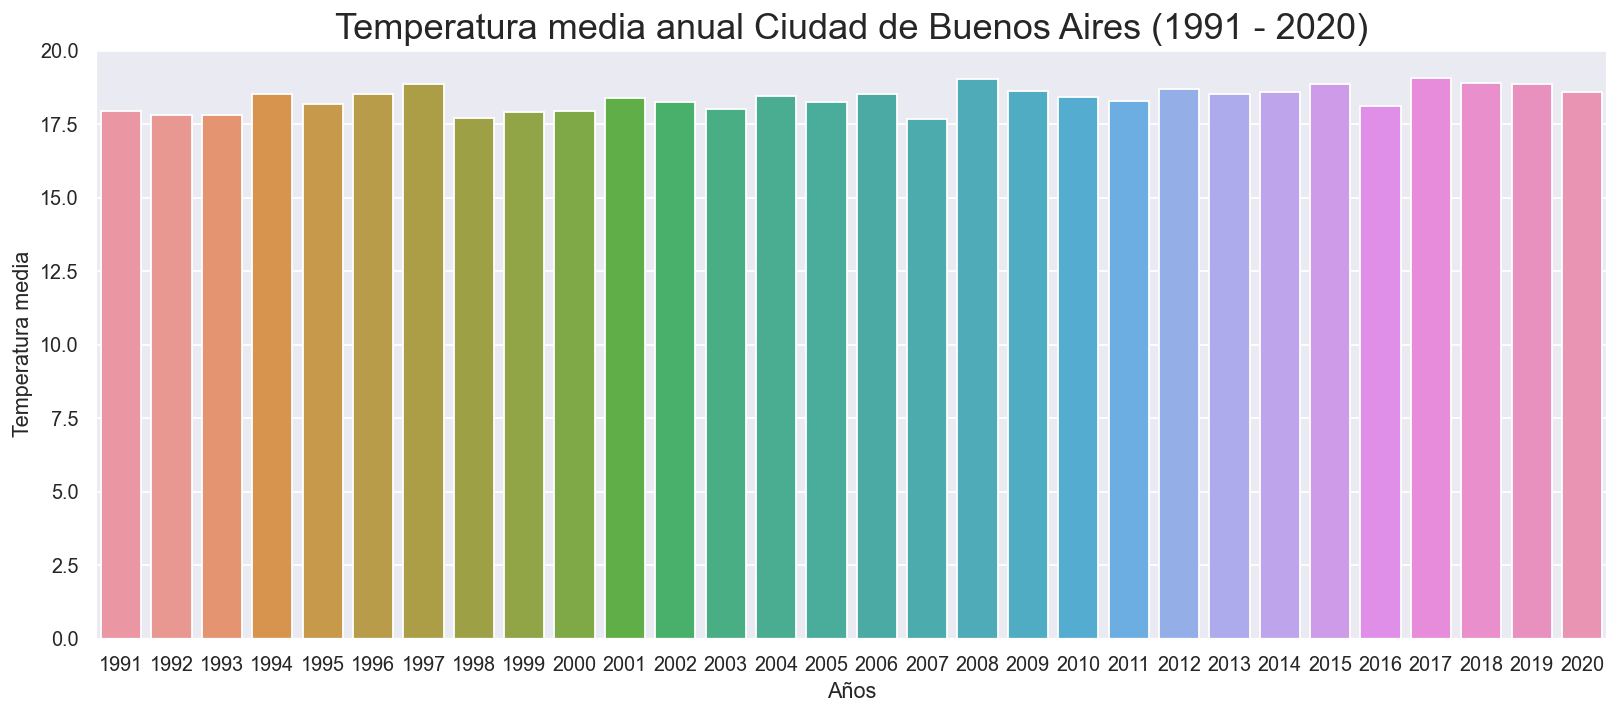

In [35]:
plt.figure(figsize=(15,6), dpi=130)
sns.barplot(media['Año'], media['Temp. Media'])
plt.xlabel('Años') 
plt.ylabel('Temperatura media')  
plt.title('Temperatura media anual Ciudad de Buenos Aires (1991 - 2020)', fontsize=20)
pass

## Detalle de los 5 años más calurosos 

In [45]:
orden = media.sort_values('Temp. Media', ascending=False)
orden.head()

,Año,Temp. Media
26,2017,19.079167
17,2008,19.033333
27,2018,18.904167
28,2019,18.883333
6,1997,18.862500


## Detalle de los 5 años más fríos 

In [46]:
orden2 = media.sort_values('Temp. Media', ascending=True)
orden2.head()

,Año,Temp. Media
16,2007,17.683333
7,1998,17.700000
1,1992,17.829167
2,1993,17.829167
8,1999,17.925000


## Temperatura media mensual de la Ciudad de Buenos Aires en el año 2020

In [62]:
veinte = df[df['Año'] == 2020]
veinte

,Año,Mes,Temp. Máx,Temp. Mín,Temp. Media,mm,días precip.
ID,,,,,,,
349,2020,Enero,30.0,20.2,25.10,52.8,8
350,2020,Febrero,29.6,19.3,24.45,66.2,4
351,2020,Marzo,28.6,20.1,24.35,158.3,11
352,2020,Abril,22.8,13.6,18.20,87.2,7
353,2020,Mayo,20.4,11.0,15.70,22.6,4
354,2020,Junio,16.9,9.1,13.00,89.2,9
355,2020,Julio,15.1,6.7,10.90,6.4,5
356,2020,Agosto,19.0,9.2,14.10,29.6,6
357,2020,Septiembre,19.3,9.8,14.55,105.9,5


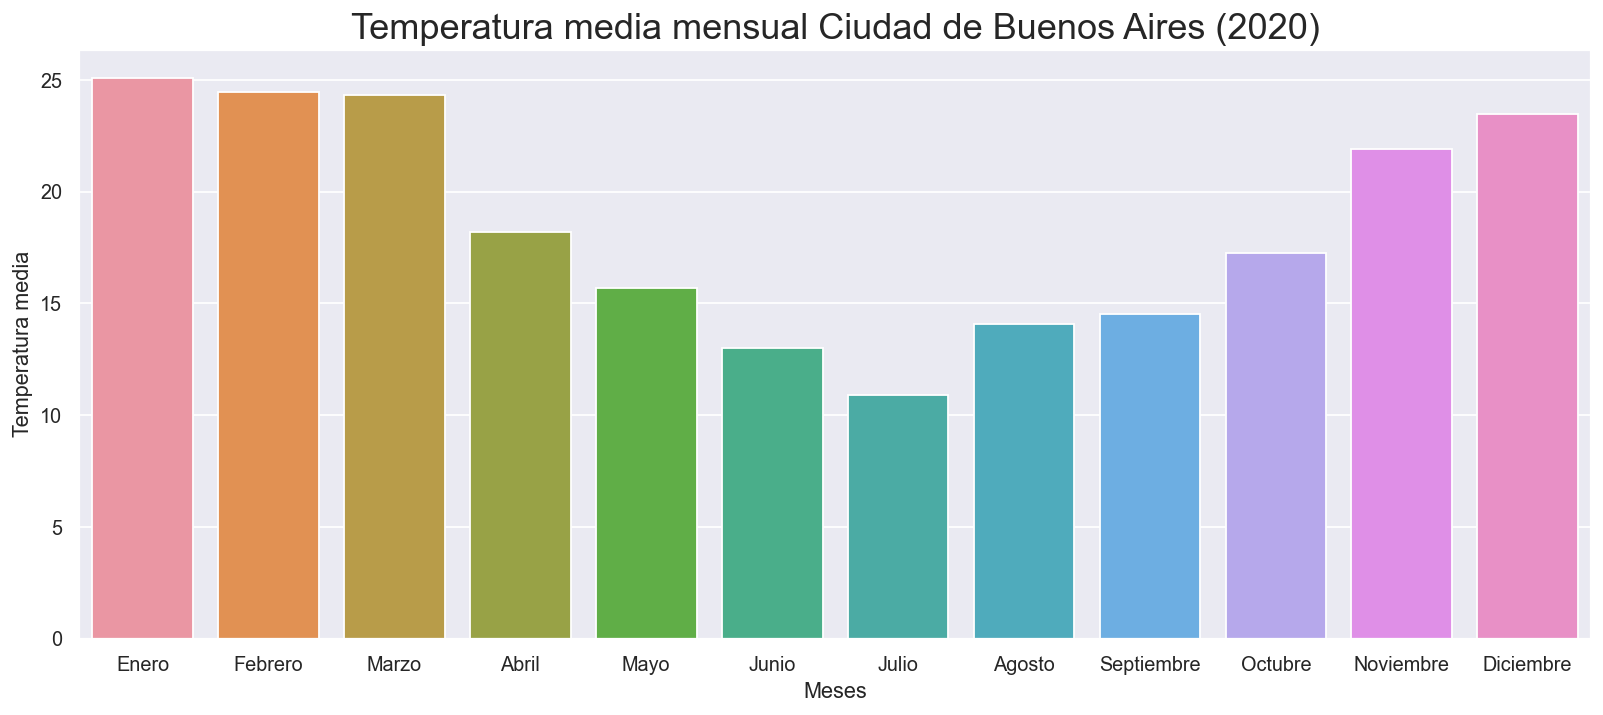

In [63]:
plt.figure(figsize=(15,6), dpi=130)
sns.barplot(veinte['Mes'], veinte['Temp. Media'])
plt.xlabel('Meses') 
plt.ylabel('Temperatura media')  
plt.title('Temperatura media mensual Ciudad de Buenos Aires (2020)', fontsize=20)
pass

## Precipitación anual en la Ciudad de Buenos Aires (1991 - 2020)

In [71]:
filtro3 = df.groupby('Año').agg({
    'mm':'sum',
    'días precip.':'sum'
})
filtro3.tail()

,mm,días precip.
Año,,
2016,1224.0,101
2017,1192.9,98
2018,1472.9,104
2019,1207.8,98
2020,836.7,78


In [72]:
filtro3.to_excel('Precipitacion_anual.xlsx')

In [73]:
prepAnual = pd.read_excel('Precipitacion_anual.xlsx')

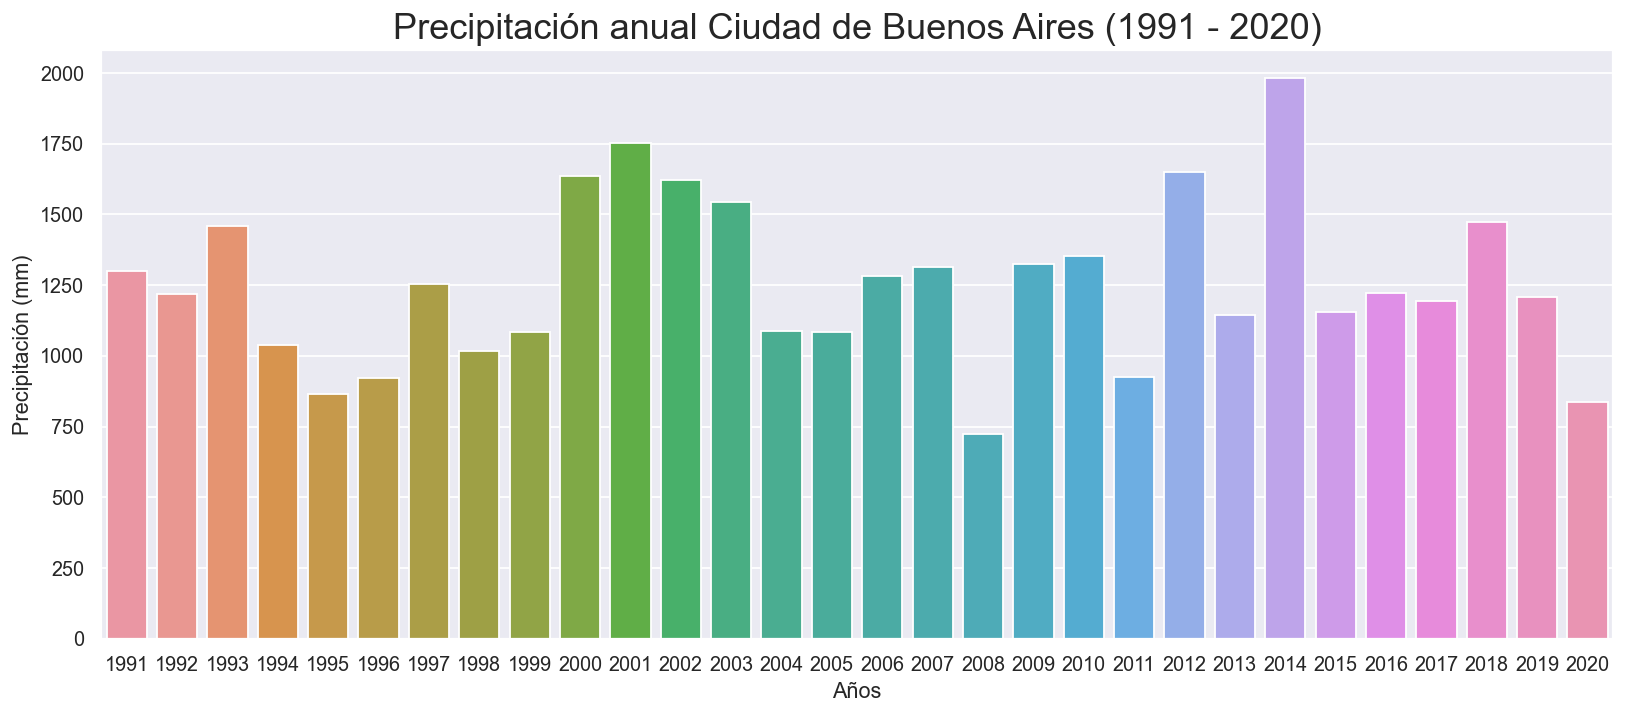

In [44]:
plt.figure(figsize=(15,6), dpi=130)
sns.barplot(prepAnual['Año'], prepAnual['mm'])
plt.xlabel('Años') 
plt.ylabel('Precipitación (mm)')  
plt.title('Precipitación anual Ciudad de Buenos Aires (1991 - 2020)', fontsize=20)
pass

## Días de precipitación por año Ciudad de Buenos Aires (1991 - 2020)

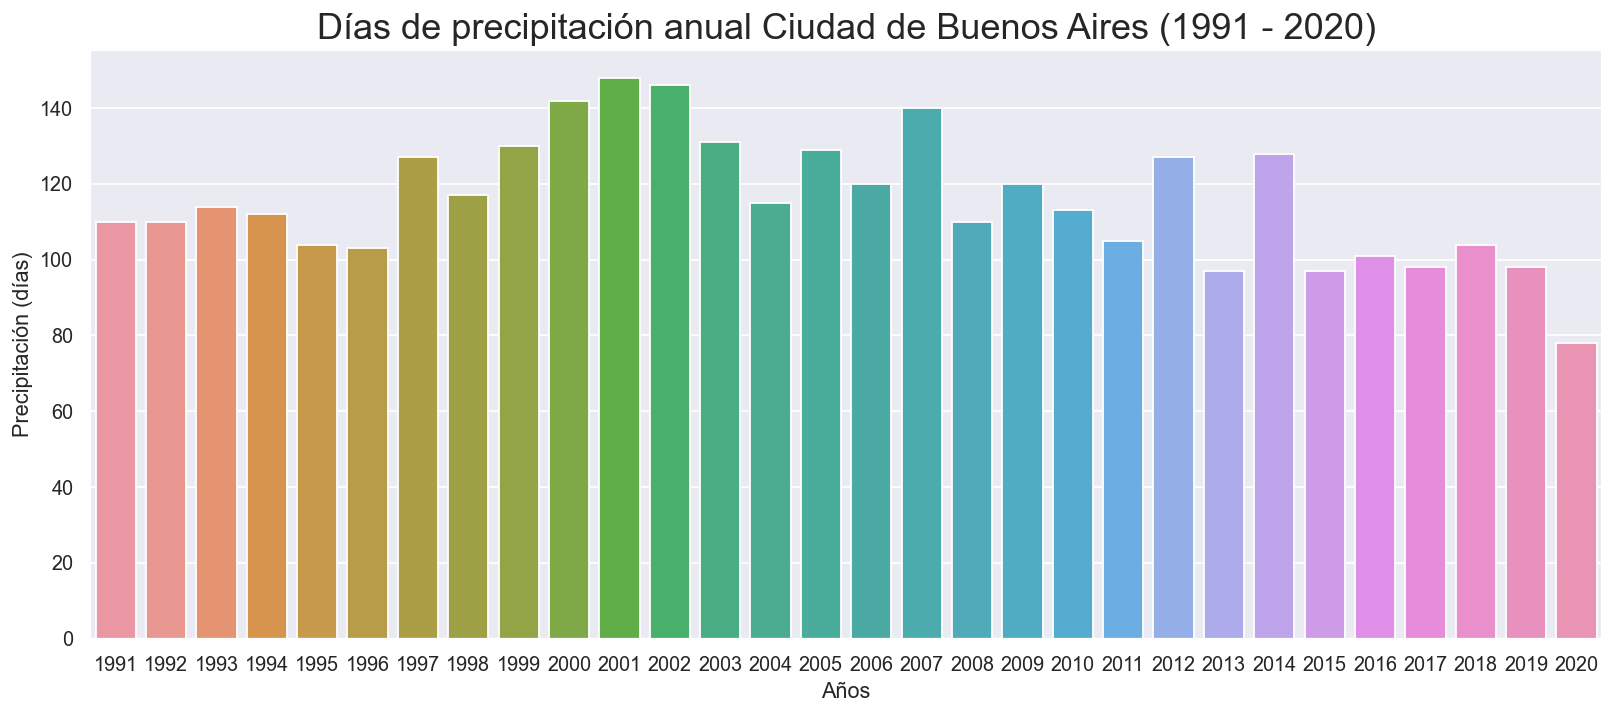

In [74]:
plt.figure(figsize=(15,6), dpi=130)
sns.barplot(prepAnual['Año'], prepAnual['días precip.'])
plt.xlabel('Años') 
plt.ylabel('Precipitación (días)')  
plt.title('Días de precipitación por año Ciudad de Buenos Aires (1991 - 2020)', fontsize=20)
pass

## Detalle de los 5 años con mayor precipitación

In [47]:
orden3 = prepAnual.sort_values('mm', ascending=False)
orden3.head()

,Año,mm
23,2014,1983.4
10,2001,1751.6
21,2012,1650.6
9,2000,1635.5
11,2002,1621.8


## Detalle de los 5 años con menor precipitación

In [49]:
orden4 = prepAnual.sort_values('mm', ascending=True)
orden4.head()

,Año,mm
17,2008,722.1
29,2020,836.7
4,1995,865.2
5,1996,921.5
20,2011,926.8


## Precipitación mensual año 2020

In [60]:
pasado = df[df['Año'] == 2020]
pasado

,Año,Mes,Temp. Máx,Temp. Mín,Temp. Media,mm,días precip.
ID,,,,,,,
349,2020,Enero,30.0,20.2,25.10,52.8,8
350,2020,Febrero,29.6,19.3,24.45,66.2,4
351,2020,Marzo,28.6,20.1,24.35,158.3,11
352,2020,Abril,22.8,13.6,18.20,87.2,7
353,2020,Mayo,20.4,11.0,15.70,22.6,4
354,2020,Junio,16.9,9.1,13.00,89.2,9
355,2020,Julio,15.1,6.7,10.90,6.4,5
356,2020,Agosto,19.0,9.2,14.10,29.6,6
357,2020,Septiembre,19.3,9.8,14.55,105.9,5


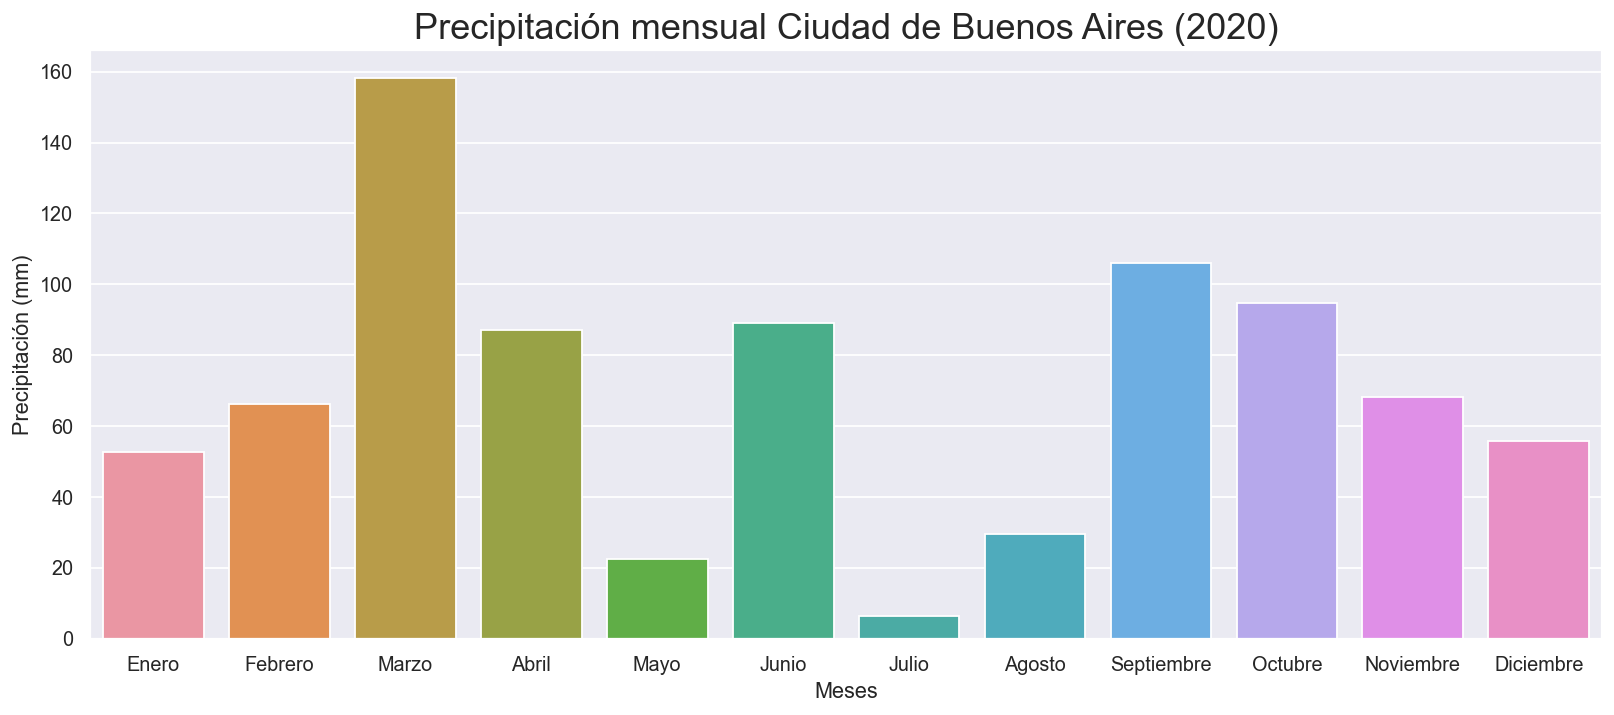

In [61]:
plt.figure(figsize=(15,6), dpi=130)
sns.barplot(pasado['Mes'], pasado['mm'])
plt.xlabel('Meses') 
plt.ylabel('Precipitación (mm)')  
plt.title('Precipitación mensual Ciudad de Buenos Aires (2020)', fontsize=20)
pass